In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import seaborn as sns; # sns.set()
# plt.rcParams['figure.figsize']=(15,10)

# fmri = sns.load_dataset("fmri")
# ax = sns.lineplot(x="timepoint", y="signal", data=fmri)
# sns.palplot(sns.color_palette("Blues"))
# sns.set_palette("Blues")

In [2]:
import torch
import pandas as pd
row_list = []
# df = pd.DataFrame(columns=['expand-ratio', 'AP50', 'qty2']) #mAP^r_50
# for ratio in ["m_25", "m_20", "m_15", "m_10", "m_5", "0", "5", "10", "15", "20",]:
for ratio in ["m_20", "m_10", "0", "10", "20",]:
    paths = glob.glob("../outputs/lvis_expand_{0}_1shot/coco_results*.pth".format(ratio))
    for path in paths:
        log = torch.load(path)
        if ratio.startswith("m_"):
            ratio = "-" + ratio[2:]
        row = {"expand-ratio": int(ratio), "AP50": log.results["segm"]["AP50"]}
        row_list.append(row)
    # ap50.append(log.results["segm"]["AP50"])
df = pd.DataFrame(row_list) 

In [3]:
df

,expand-ratio,AP50
0,-20,0.282713
1,-20,0.255774
2,-20,0.262428
3,-20,0.277278
4,-20,0.253950
5,-10,0.281570
6,-10,0.272654
7,-10,0.283645
8,-10,0.286142
9,-10,0.280366


In [4]:
import numpy as np
np.arange(-20, 30, 10.0)

array([-20., -10.,   0.,  10.,  20.])

In [5]:
df["AP50"] = df["AP50"]*100 

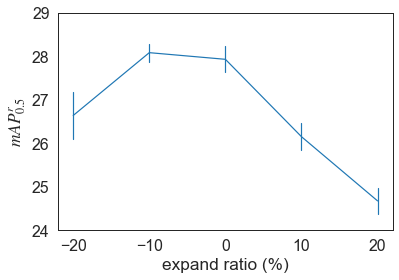

In [6]:

# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams['font.family'] = 'serif'

# plt.rcParams['font.serif'] = ['Times']
sns.set_style("white")

# sns.set_style("darkgrid", {
#     "font.family": "serif",
#     "font.serif": ["Times", "Palatino", "serif"]
# })

plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
# plt.rcParams['font.family'] = ['serif']
plt.rcParams["mathtext.fontset"] = "stix"
# sns.set(font='Times New Roman',)
# sns.set_style("ticks")
# sns.set_style({'font.family': 'Times New Roman'})
sns.set_context("paper", font_scale=1.8)
# plt.rc('font',family='serif') 
# , err_style="bars"  ci=95
ax = sns.lineplot(x="expand-ratio", y="AP50",err_style="bars", data=df, ci=68)
ax.set(xlabel='expand ratio (%)', ylabel='$mAP^{r}_{0.5}$')
# xranges = [str(r) for r in xranges]
ax.set_xticks(np.arange(-20.0, 30.0, 10.0))
ax.set_yticks(np.arange(24.0, 30.0, 1.0))
ax.get_figure().savefig("expand.pdf", bbox_inches ='tight')
# plt.savefig("expand.pdf")

In [7]:
for shot in ["m_20", "m_10", "0", "10", "20",]:
    paths = glob.glob("../outputs/lvis_expand_{0}_1shot/coco_results*.pth".format(ratio))
    for path in paths:
        log = torch.load(path)
        if ratio.startswith("m_"):
            ratio = "-" + ratio[2:]
        row = {"expand-ratio": int(ratio), "AP50": log.results["segm"]["AP50"]}
        row_list.append(row)
    # ap50.append(log.results["segm"]["AP50"])
df = pd.DataFrame(row_list)

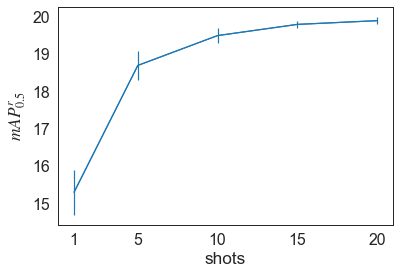

In [8]:
# for shot in [1, 5, 10, 15, 20]:
#     print(shot)
sns.set_style("white")
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
# plt.rcParams['font.family'] = ['serif']
# plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["mathtext.fontset"] = "stix"
sns.set_context("paper", font_scale=1.8)
y = [15.3, 18.7,19.5,19.8,19.9]
x = [1, 5, 10, 15, 20]
yerr = [0.6,0.4,0.2,0.1,0.1]
ax = sns.lineplot(x=x, y=y)
ax.set_xlim([0, 21])
ax.set_xticks([1, 5, 10, 15, 20])
ax.set(xlabel='shots', ylabel='$mAP^{r}_{0.5}$')
plt.errorbar(x=x, y=y, yerr=yerr, color="#1f77b4")
ax.get_figure().savefig("fig_shot.pdf", bbox_inches ='tight')

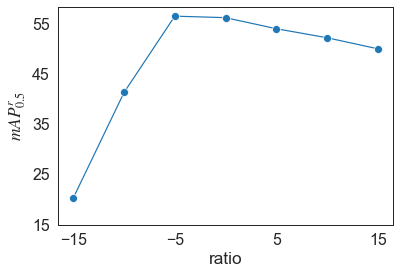

In [9]:
import torch
import pandas as pd
row_list = [
    {"expand-ratio": -15, "AP50": 20.3},
    {"expand-ratio": -10, "AP50": 41.3},
    {"expand-ratio": -5, "AP50": 56.5},
    {"expand-ratio": -0, "AP50": 56.2},
    {"expand-ratio": 5, "AP50": 54.0},
    {"expand-ratio": 10, "AP50": 52.2},
    {"expand-ratio": 15, "AP50": 50.0},
]

df = pd.DataFrame(row_list) 

# TAPMI Fig          
# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams['font.family'] = 'serif'

# plt.rcParams['font.serif'] = ['Times']
sns.set_style("white")

# sns.set_style("darkgrid", {
#     "font.family": "serif",
#     "font.serif": ["Times", "Palatino", "serif"]
# })

plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
# plt.rcParams['font.family'] = ['serif']
plt.rcParams["mathtext.fontset"] = "stix"
# sns.set(font='Times New Roman',)
# sns.set_style("ticks")
# sns.set_style({'font.family': 'Times New Roman'})
sns.set_context("paper", font_scale=1.8)
# plt.rc('font',family='serif') 
# , err_style="bars"  ci=95
ax = sns.lineplot(x="expand-ratio", y="AP50",err_style="bars", 
                  data=df, marker='o', markersize=8)
ax.set(xlabel='ratio', ylabel='$mAP^{r}_{0.5}$')
# xranges = [str(r) for r in xranges]
ax.set_xticks(np.arange(-15.0, 20.0, 10.0))
ax.set_yticks(np.arange(15.0, 60.0, 10.0))
ax.get_figure().savefig("RobustnessStudies.pdf", bbox_inches ='tight')
# plt.savefig("expand.pdf") 

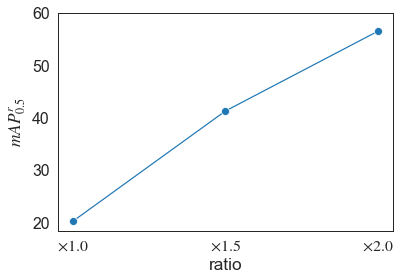

In [10]:
import torch
import pandas as pd
row_list = [
    {"expand-ratio": 1.0, "AP50": 20.3},
    {"expand-ratio": 1.5, "AP50": 41.3},
    {"expand-ratio": 2.0, "AP50": 56.5},
]

df = pd.DataFrame(row_list) 

# TAPMI Fig          
# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams['font.family'] = 'serif'

# plt.rcParams['font.serif'] = ['Times']
sns.set_style("white")

# sns.set_style("darkgrid", {
#     "font.family": "serif",
#     "font.serif": ["Times", "Palatino", "serif"]
# })

plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
# plt.rcParams['font.family'] = ['serif']
plt.rcParams["mathtext.fontset"] = "stix"
# sns.set(font='Times New Roman',)
# sns.set_style("ticks")
# sns.set_style({'font.family': 'Times New Roman'})
sns.set_context("paper", font_scale=1.8)
# plt.rc('font',family='serif') 
# , err_style="bars"  ci=95
ax = sns.lineplot(x="expand-ratio", y="AP50", markers=True, data=df, marker='o', markersize=8)
ax.set(xlabel='ratio', ylabel='$mAP^{r}_{0.5}$')
# xranges = [str(r) for r in xranges]

ax.set_xticks(np.arange(1.0, 2.1, 0.5))
ax.set_xticklabels([r'$\times 1.0$', r'$\times 1.5$', r'$\times 2.0$'])
ax.set_yticks(np.arange(20.0, 70.0, 10.0))
ax.get_figure().savefig("AnnotationEffortStudies.pdf", bbox_inches ='tight')
# plt.savefig("expand.pdf") 

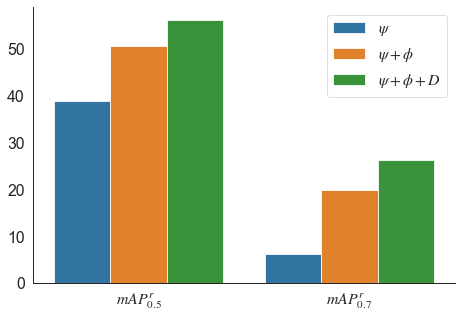

In [14]:
import torch
import pandas as pd
row_list = [
    {"threshold": '$mAP^{r}_{0.5}$', "type":"$\psi$", "AP50": 39.0},
    {"threshold": '$mAP^{r}_{0.5}$', "type":"$\psi+\phi$", "AP50": 50.6},
    {"threshold": '$mAP^{r}_{0.5}$', "type":"$\psi+\phi+D$", "AP50": 56.2},
    {"threshold": '$mAP^{r}_{0.7}$', "type":"$\psi$", "AP50": 6.2},
    {"threshold": '$mAP^{r}_{0.7}$', "type":"$\psi+\phi$", "AP50": 20.0},
    {"threshold": '$mAP^{r}_{0.7}$', "type":"$\psi+\phi+D$", "AP50": 26.3},
]

df = pd.DataFrame(row_list) 

# TAPMI Fig          
# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams['font.family'] = 'serif'

# plt.rcParams['font.serif'] = ['Times']
sns.set_style("white")

# sns.set_style("darkgrid", {
#     "font.family": "serif",
#     "font.serif": ["Times", "Palatino", "serif"]
# })
# sns.set(rc={'figure.figsize':(100,10)})
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
# plt.rcParams['font.family'] = ['serif']
plt.rcParams["mathtext.fontset"] = "stix"
# sns.set(font='Times New Roman',)
# sns.set_style("ticks")
# sns.set_style({'font.family': 'Times New Roman'})
sns.set_context("paper", font_scale=1.8)
# plt.rc('font',family='serif') 
# , err_style="bars"  ci=95
ax = sns.catplot(x="threshold", y="AP50", hue="type", data=df,
                 kind="bar",  legend_out=False, aspect=1.4)
ax.set(xlabel=None, ylabel=None)
# xranges = [str(r) for r in xranges]
plt.legend(title=None)
# ax.set_xticks(np.arange(1.0, 2.1, 0.5))
# ax.set_xticklabels([r'$\times 1.0$', r'$\times 1.5$', r'$\times 2.0$'])
# ax.set_yticks(np.arange(20.0, 70.0, 10.0))
ax.savefig("Ab_Stu.pdf", bbox_inches ='tight')
# plt.savefig("expand.pdf") 

In [12]:
ax